<a href="https://colab.research.google.com/github/Ykaro-Ayres/Analise-com-Python/blob/main/RID108375_Desafio07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Carregar os dados
file_path = "/data (1).csv"
df = pd.read_csv(file_path, encoding="latin1")

# Exibir as primeiras linhas
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Verificar informações gerais do dataset
df.info()

# Estatísticas descritivas das colunas numéricas
df.describe()

# Estatísticas para colunas categóricas
df.describe(include="object")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [ ]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


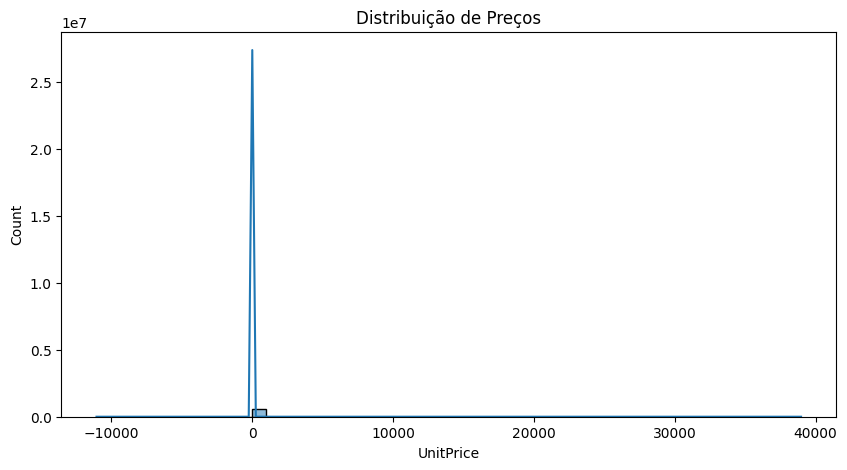

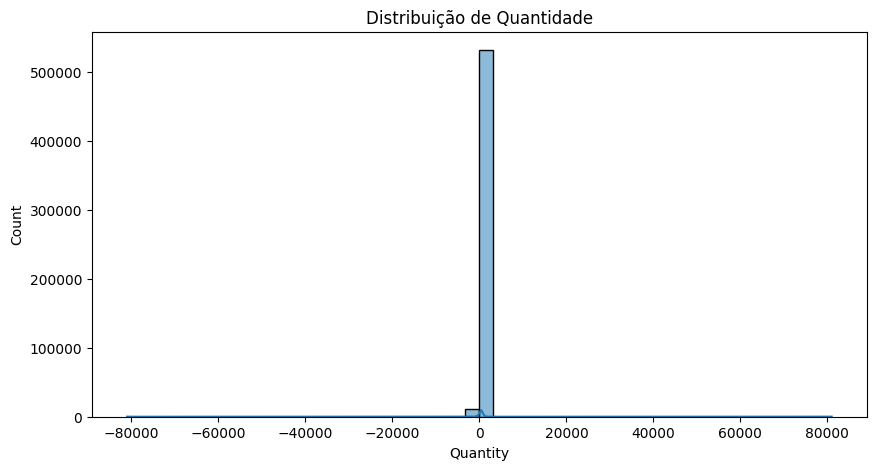

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição de preços
plt.figure(figsize=(10, 5))
sns.histplot(df["UnitPrice"], bins=50, kde=True)
plt.title("Distribuição de Preços")
plt.show()

# Distribuição de quantidade
plt.figure(figsize=(10, 5))
sns.histplot(df["Quantity"], bins=50, kde=True)
plt.title("Distribuição de Quantidade")
plt.show()


In [ ]:
# Contar valores nulos
df.isnull().sum()



,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
# Remover linhas com CustomerID nulo (não são úteis para RFV)
df = df.dropna(subset=["CustomerID"])

In [ ]:
# Converter CustomerID para string
df["CustomerID"] = df["CustomerID"].astype(int).astype(str)

In [ ]:
# Converter InvoiceDate para datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%Y %H:%M")

In [ ]:
# Verificar valores duplicados
duplicatas = df.duplicated().sum()
print(f"Total de registros duplicados: {duplicatas}")

Total de registros duplicados: 5225


In [ ]:
# Identificar transações com valores negativos
df_negativos = df[(df["Quantity"] < 0) | (df["UnitPrice"] < 0)]
df_negativos.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [ ]:
# Remover registros duplicados
df = df.drop_duplicates()
print(f"Total de registros após remover duplicatas: {df.shape[0]}")


Total de registros após remover duplicatas: 401604


In [ ]:
# Remover transações com valores negativos
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
print(f"Total de registros após remover transações negativas: {df.shape[0]}")


Total de registros após remover transações negativas: 392692


In [ ]:
# Definir uma função para remover outliers usando o método IQR
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

# Aplicar a função nas colunas de interesse
df = remover_outliers(df, "Quantity")
df = remover_outliers(df, "UnitPrice")

print(f"Total de registros após remover outliers: {df.shape[0]}")


Total de registros após remover outliers: 333234


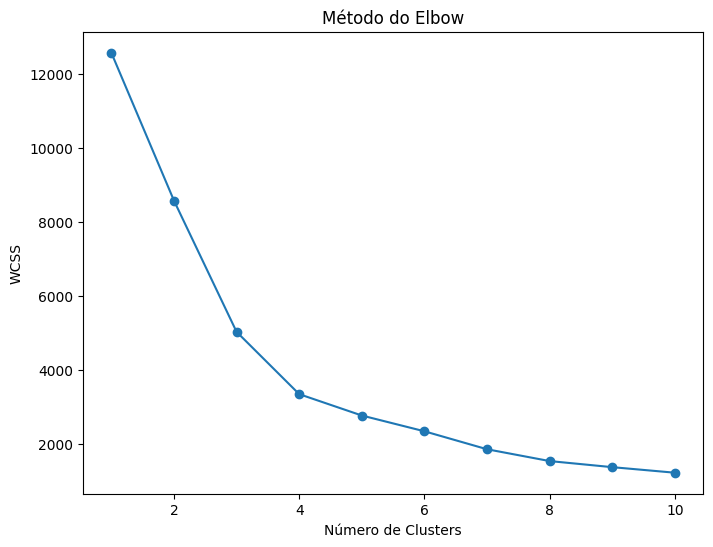

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
wcss = []

for i in range(1, 11):  # Testando até 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(rfv_scaled)
    wcss.append(kmeans.inertia_)

# Plotando o Elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Definindo o número de clusters com base no gráfico do Elbow
n_clusters = 4

# Aplicando o KMeans
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
rfv['Cluster_KMeans'] = kmeans.fit_predict(rfv_scaled)

# Verificar a quantidade de clientes em cada cluster
print(rfv['Cluster_KMeans'].value_counts())


Cluster_KMeans
0    2861
3    1032
2     294
1       4
Name: count, dtype: int64


In [ ]:
# Calcular as estatísticas dos clusters
cluster_profile = rfv.groupby('Cluster_KMeans').mean()
print(cluster_profile)


                  Recencia   Frequencia         Valor   Cluster  \
Cluster_KMeans                                                    
0                43.380986    61.098567    806.104363  2.593149   
1                 1.000000  5039.250000  43436.300000  1.750000   
2                13.727891   385.241497   5105.206054  6.676871   
3               247.378876    24.237403    308.658741  3.720930   

                Cluster_DBSCAN  
Cluster_KMeans                  
0                     0.000000  
1                    -1.000000  
2                    -0.013605  
3                     0.000000  


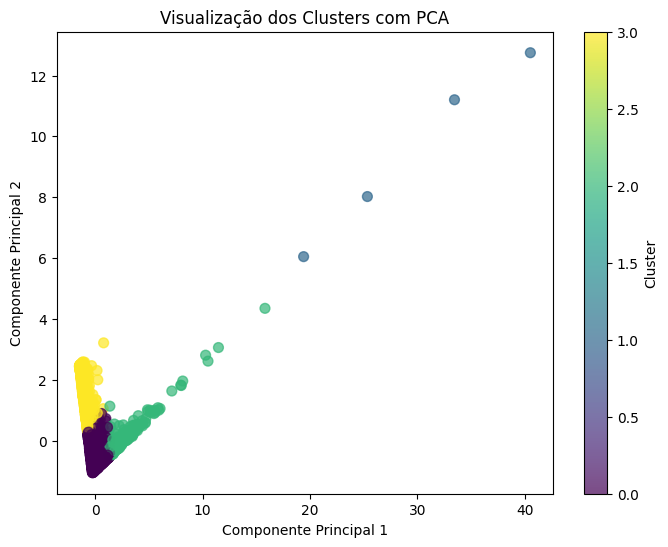

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduzir a dimensionalidade dos dados com PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rfv_scaled)

# Adicionar os resultados da PCA ao dataframe
rfv['PCA_1'] = pca_result[:, 0]
rfv['PCA_2'] = pca_result[:, 1]

# Plotando os clusters
plt.figure(figsize=(8, 6))
plt.scatter(rfv['PCA_1'], rfv['PCA_2'], c=rfv['Cluster_KMeans'], cmap='viridis', s=50, alpha=0.7)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Filtrando os clientes do Cluster 1
cluster_1_customers = rfv[rfv['Cluster_KMeans'] == 1]
print(cluster_1_customers)


            Recencia  Frequencia     Valor  Cluster  Cluster_DBSCAN  \
CustomerID                                                            
12748              0        4046  20519.88        1              -1   
14096              3        4415  36019.84        1              -1   
14911              0        4487  84980.89        4              -1   
17841              1        7209  32224.59        1              -1   

            Cluster_KMeans      PCA_1      PCA_2  
CustomerID                                        
12748                    1  19.400562   6.047690  
14096                    1  25.342081   8.022583  
14911                    1  40.524622  12.749122  
17841                    1  33.456355  11.203331  


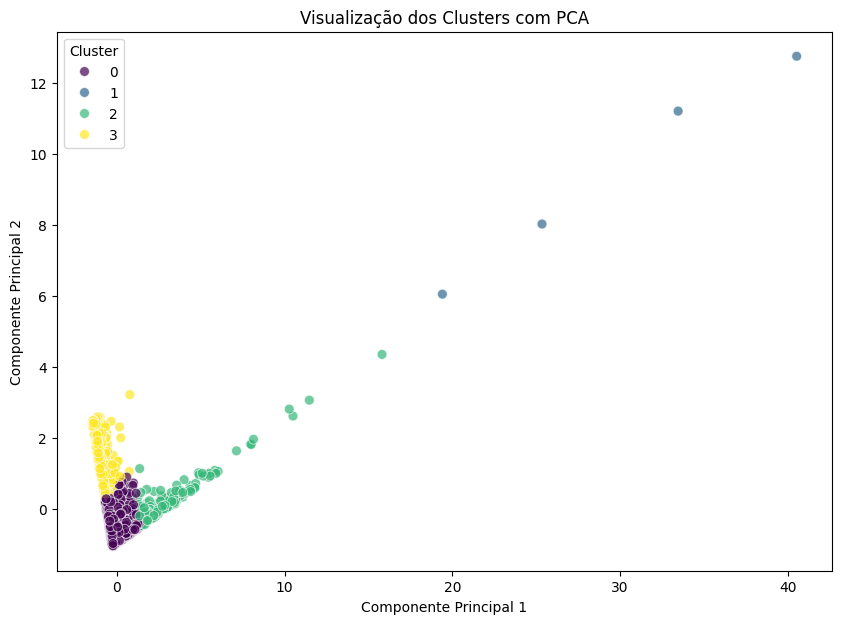

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster_KMeans', data=rfv, palette='viridis', s=50, alpha=0.7)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
cluster_profile = rfv.groupby("Cluster_KMeans")[["Recencia", "Frequencia", "Valor"]].mean()
print("Perfil dos Clusters:\n", cluster_profile)


Perfil dos Clusters:
                   Recencia   Frequencia         Valor
Cluster_KMeans                                       
0                43.380986    61.098567    806.104363
1                 1.000000  5039.250000  43436.300000
2                13.727891   385.241497   5105.206054
3               247.378876    24.237403    308.658741


In [ ]:
# Verificar os nomes das colunas do DataFrame 'rfv'
rfv.columns


Index(['Recencia', 'Frequencia', 'Valor', 'Cluster', 'Cluster_DBSCAN',
       'Cluster_KMeans', 'PCA_1', 'PCA_2'],
      dtype='object')

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month'],
      dtype='object')

In [ ]:
# Verificando se 'InvoiceDate' está em formato datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
# Calcular a data mais recente na base de dados
current_date = df['InvoiceDate'].max()


In [ ]:
# Calcular a Recência (em dias)
df['Recency'] = (current_date - df['InvoiceDate']).dt.days

In [ ]:
# Calcular a Frequência (número de transações por cliente)
rfv = df.groupby('CustomerID').agg(
    Recency=('Recency', 'min'),  # A recência é a diferença entre a data mais recente e a última compra
    Frequency=('InvoiceNo', 'nunique'),  # Número de compras únicas por cliente
    Monetary=('Quantity', 'sum')  # Valor total gasto (pode ser modificado para UnitPrice * Quantity, se preferir)
)

# Exibir as primeiras linhas do cálculo de RFV
rfv.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,1,7,1893
12348,248,3,140
12349,18,1,523
12350,309,1,196
12352,35,7,500


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Escalar as métricas RFV
scaler = StandardScaler()
rfv_scaled = scaler.fit_transform(rfv)


In [ ]:
# Aplicar KMeans com o número de clusters ideal
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(rfv_scaled)


In [ ]:
# Adicionar os rótulos de clusters ao DataFrame original
rfv['Cluster_KMeans'] = kmeans_labels

# Verificar as primeiras linhas do DataFrame com os clusters
rfv.head()

,Recency,Frequency,Monetary,Cluster_KMeans
CustomerID,,,,
12347,1,7,1893,0
12348,248,3,140,3
12349,18,1,523,0
12350,309,1,196,3
12352,35,7,500,0


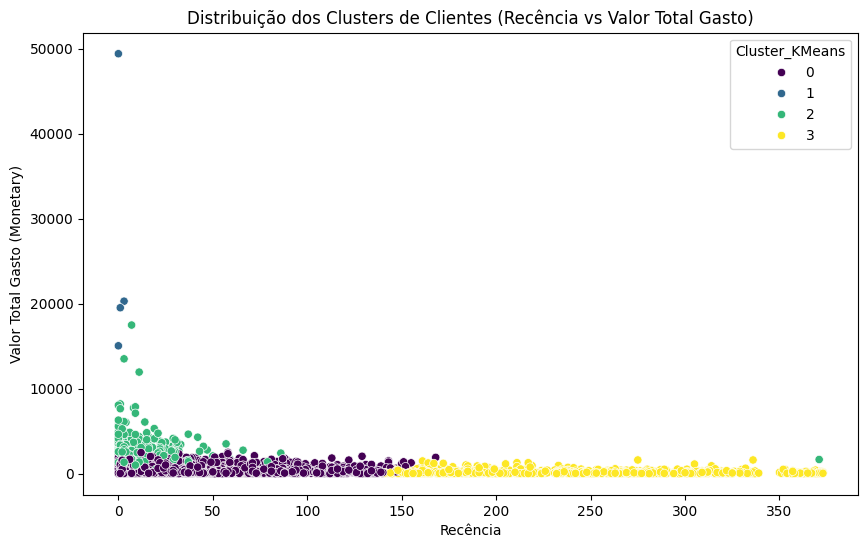

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersão para visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfv['Recency'], y=rfv['Monetary'], hue=rfv['Cluster_KMeans'], palette='viridis')
plt.title('Distribuição dos Clusters de Clientes (Recência vs Valor Total Gasto)')
plt.xlabel('Recência')
plt.ylabel('Valor Total Gasto (Monetary)')
plt.show()


In [ ]:
# Calcular as médias das métricas para cada cluster
cluster_profile = rfv.groupby('Cluster_KMeans').agg(
    Recency=('Recency', 'mean'),
    Frequency=('Frequency', 'mean'),
    Monetary=('Monetary', 'mean')
)

# Exibir o perfil de cada cluster
print(cluster_profile)


                   Recency   Frequency      Monetary
Cluster_KMeans                                      
0                43.428022    3.356394    488.835779
1                 1.000000  148.000000  26059.000000
2                12.273356   17.522491   2879.013841
3               246.723938    1.509653    174.541506


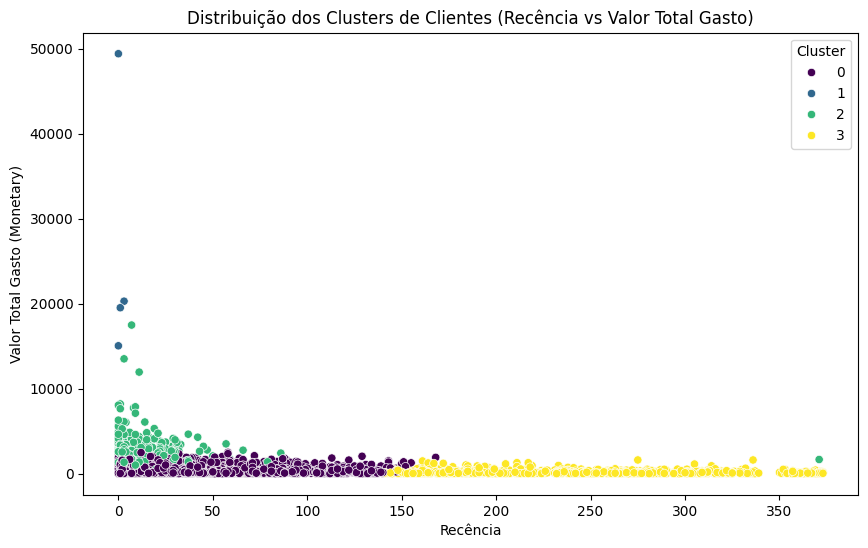

In [ ]:
# Gráfico de dispersão Recência vs Valor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfv['Recency'], y=rfv['Monetary'], hue=rfv['Cluster_KMeans'], palette='viridis')
plt.title('Distribuição dos Clusters de Clientes (Recência vs Valor Total Gasto)')
plt.xlabel('Recência')
plt.ylabel('Valor Total Gasto (Monetary)')
plt.legend(title='Cluster')
plt.show()



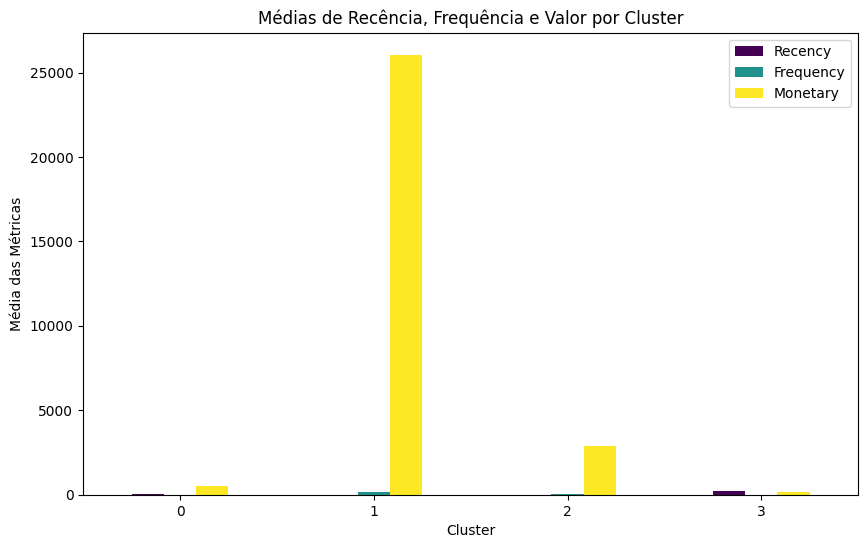

In [ ]:
# Gráfico de barras para as médias de Recência, Frequência e Monetary por Cluster
cluster_profile.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Médias de Recência, Frequência e Valor por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média das Métricas')
plt.xticks(rotation=0)
plt.show()


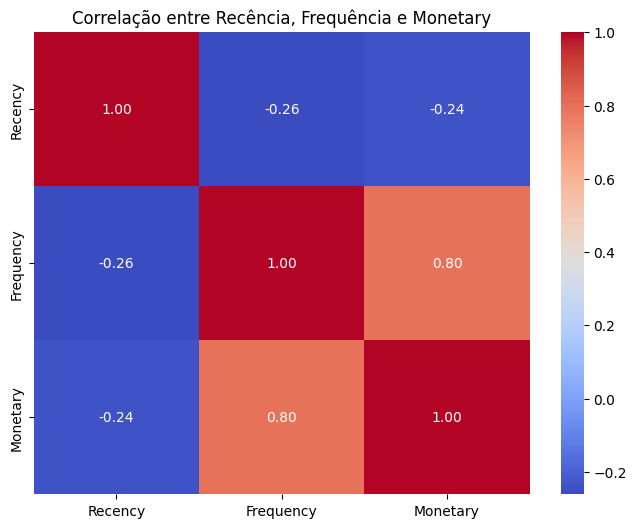

In [ ]:
# Heatmap para verificar a correlação entre as métricas
corr_matrix = rfv[['Recency', 'Frequency', 'Monetary']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlação entre Recência, Frequência e Monetary')
plt.show()


In [ ]:
# Criar um DataFrame com as médias das métricas por cluster
cluster_summary = rfv.groupby('Cluster_KMeans').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()


In [ ]:
# Adicionar uma interpretação para cada cluster
def interpretar_cluster(row):
    if row['Recency'] <= 30 and row['Frequency'] > 100 and row['Monetary'] > 5000:
        return 'Clientes VIP: Compram frequentemente e gastam muito.'
    elif row['Recency'] <= 90 and row['Frequency'] > 50:
        return 'Clientes Frequentes: Compram regularmente, mas gastam menos.'
    elif row['Recency'] > 180 and row['Frequency'] < 5:
        return 'Clientes Inativos: Compras raras e não voltaram há muito tempo.'
    else:
        return 'Clientes Ocasionalmente Ativos: Compram esporadicamente.'

In [ ]:
# Aplicar a interpretação ao cluster
cluster_summary['Perfil'] = cluster_summary.apply(interpretar_cluster, axis=1)

In [ ]:
# Exibir a análise do perfil dos clusters
print(cluster_summary)


   Cluster_KMeans     Recency   Frequency      Monetary  \
0               0   43.428022    3.356394    488.835779   
1               1    1.000000  148.000000  26059.000000   
2               2   12.273356   17.522491   2879.013841   
3               3  246.723938    1.509653    174.541506   

                                              Perfil  
0  Clientes Ocasionalmente Ativos: Compram espora...  
1  Clientes VIP: Compram frequentemente e gastam ...  
2  Clientes Ocasionalmente Ativos: Compram espora...  
3  Clientes Inativos: Compras raras e não voltara...  


In [ ]:
# Utilidade da Análise para a Empresa na Segmentação de Clientes

#A segmentação dos clientes com base nos clusters obtidos fornece informações cruciais sobre o comportamento de compra. Com essas informações, a empresa pode:

  #Personalizar ofertas: Por exemplo, para os clientes do Cluster 1, a empresa pode oferecer promoções de produtos de alto valor ou exclusivas. Já os clientes do Cluster 2 e 3 podem receber descontos e incentivos para aumentar o engajamento.

  #Focar em reativação: Os clientes do Cluster 3, por exemplo, podem ser considerados "inativos" e, portanto, campanhas de reativação, como descontos em compras futuras, podem ser direcionadas a eles.

  #Manter a fidelização: O Cluster 0 representa clientes com boas taxas de frequência, mas com baixo gasto. Estratégias de fidelização, como programas de pontos ou ofertas de pacotes, podem ser desenvolvidas para aumentar o valor de cada compra.

  #Desenvolver campanhas direcionadas: O Cluster 1 pode ser alvo de campanhas VIP ou de alta prioridade, enquanto outros clusters podem receber campanhas com base no seu comportamento.

In [ ]:
# Função para sugerir ações de marketing para cada perfil de cliente
def sugerir_acoes(row):
    if "VIP" in row['Perfil']:
        return "Oferecer programas de fidelidade, descontos exclusivos e prévias de lançamentos."
    elif "Frequentes" in row['Perfil']:
        return "Enviar ofertas personalizadas com base no histórico de compras e cupons de desconto."
    elif "Inativos" in row['Perfil']:
        return "Reativar com campanhas de e-mail marketing, descontos agressivos e incentivos de recompra."
    else:  # "Clientes Ocasionalmente Ativos"
        return "Criar campanhas de engajamento e promoções sazonais para aumentar a frequência de compras."


In [ ]:
# Aplicar a função e adicionar uma nova coluna com as sugestões
cluster_summary['Sugestao_Acao'] = cluster_summary.apply(sugerir_acoes, axis=1)

# Exibir as sugestões de ações para cada cluster
print(cluster_summary[['Cluster_KMeans', 'Perfil', 'Sugestao_Acao']])

   Cluster_KMeans                                             Perfil  \
0               0  Clientes Ocasionalmente Ativos: Compram espora...   
1               1  Clientes VIP: Compram frequentemente e gastam ...   
2               2  Clientes Ocasionalmente Ativos: Compram espora...   
3               3  Clientes Inativos: Compras raras e não voltara...   

                                       Sugestao_Acao  
0  Criar campanhas de engajamento e promoções saz...  
1  Oferecer programas de fidelidade, descontos ex...  
2  Criar campanhas de engajamento e promoções saz...  
3  Reativar com campanhas de e-mail marketing, de...  
